<a href="https://colab.research.google.com/github/CodeCraftTejas/OIBSIP/blob/main/Task2_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Unemployment in India.csv"
df = pd.read_csv(file_path)

In [4]:
# Basic info
print("Columns:", df.columns)
print(df.head())

Columns: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0          

In [8]:
# Rename columns for convenience
# Strip extra whitespace from column names
df.columns = df.columns.str.strip()

df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
}, inplace=True)

# Show actual column names
print("🧾 Available columns:", df.columns.tolist())

# Try again
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print("✅ 'Date' column converted successfully.")
else:
    print("❌ 'Date' column not found.")

🧾 Available columns: ['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Area']
✅ 'Date' column converted successfully.


In [9]:
# Step 4: Descriptive stats
print("\nDescriptive Stats:\n", df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].describe())




Descriptive Stats:
        Unemployment_Rate      Employed  Labour_Participation_Rate
count         740.000000  7.400000e+02                 740.000000
mean           11.787946  7.204460e+06                  42.630122
std            10.721298  8.087988e+06                   8.111094
min             0.000000  4.942000e+04                  13.330000
25%             4.657500  1.190404e+06                  38.062500
50%             8.350000  4.744178e+06                  41.160000
75%            15.887500  1.127549e+07                  45.505000
max            76.740000  4.577751e+07                  72.570000


In [15]:
print(df['Region'].unique())

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']


In [17]:
print(df['Area'].unique())

['Rural' nan 'Urban']


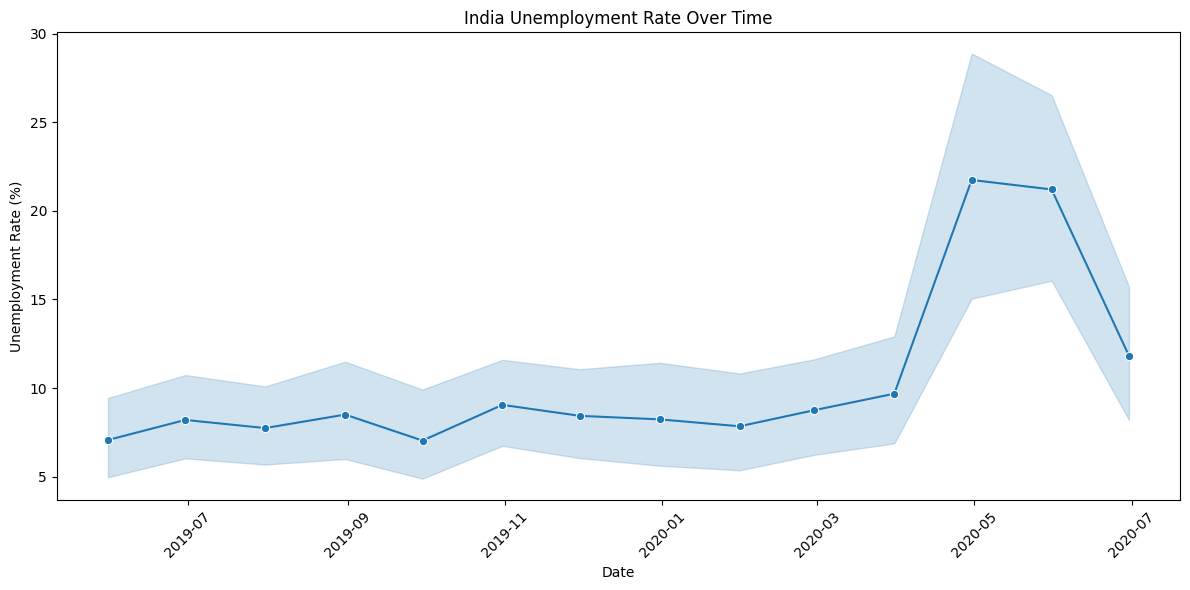

In [16]:
# Step 5: Visualize overall national trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['Area']=='Rural'], x='Date', y='Unemployment_Rate', marker='o')
plt.title("India Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Ensure data types are correct
df['Region'] = df['Region'].astype(str).str.strip().str.title()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Unemployment_Rate'] = pd.to_numeric(df['Unemployment_Rate'], errors='coerce')

# Drop rows with missing values in important columns
df_clean = df.dropna(subset=['Date', 'Unemployment_Rate', 'Region'])



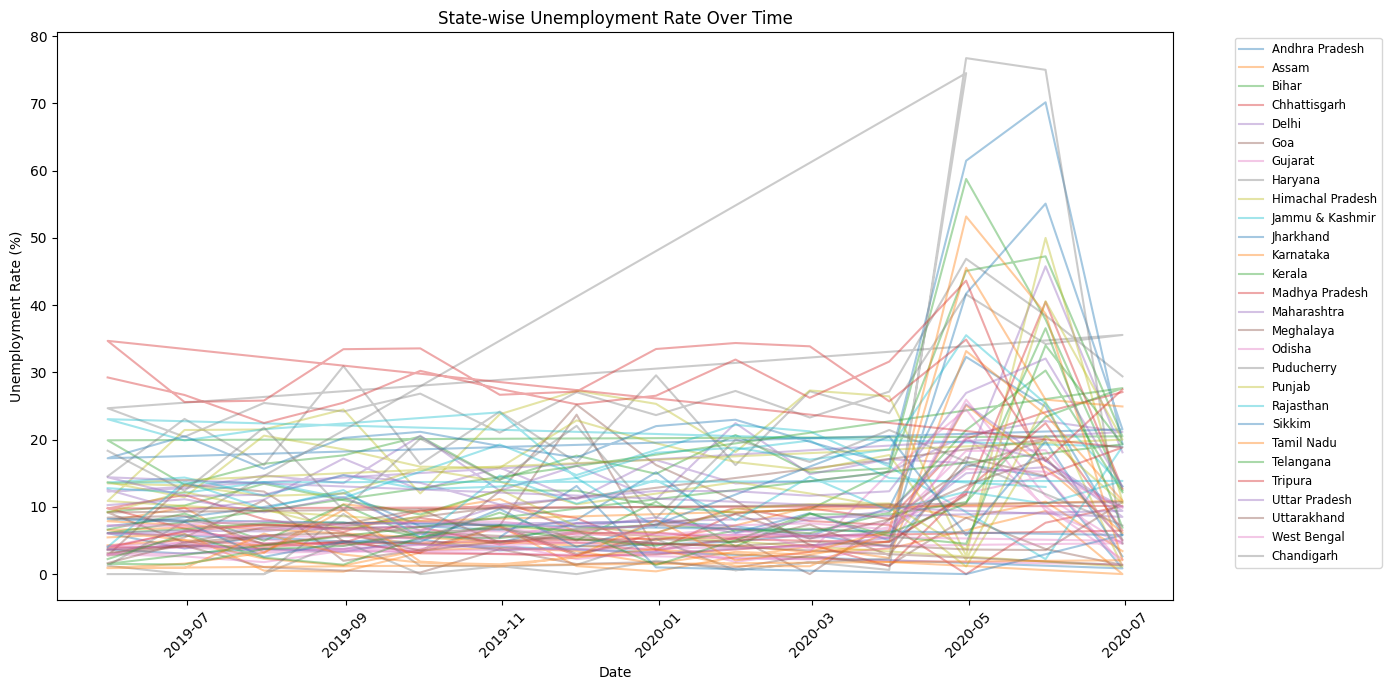

In [23]:
# Plot
plt.figure(figsize=(14,7))
for region in df_clean['Region'].unique():
    subset = df_clean[df_clean['Region'] == region]
    plt.plot(subset['Date'], subset['Unemployment_Rate'], label=region, alpha=0.4)

plt.title("State-wise Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(bbox_to_anchor=(1.05,1), ncol=1, fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


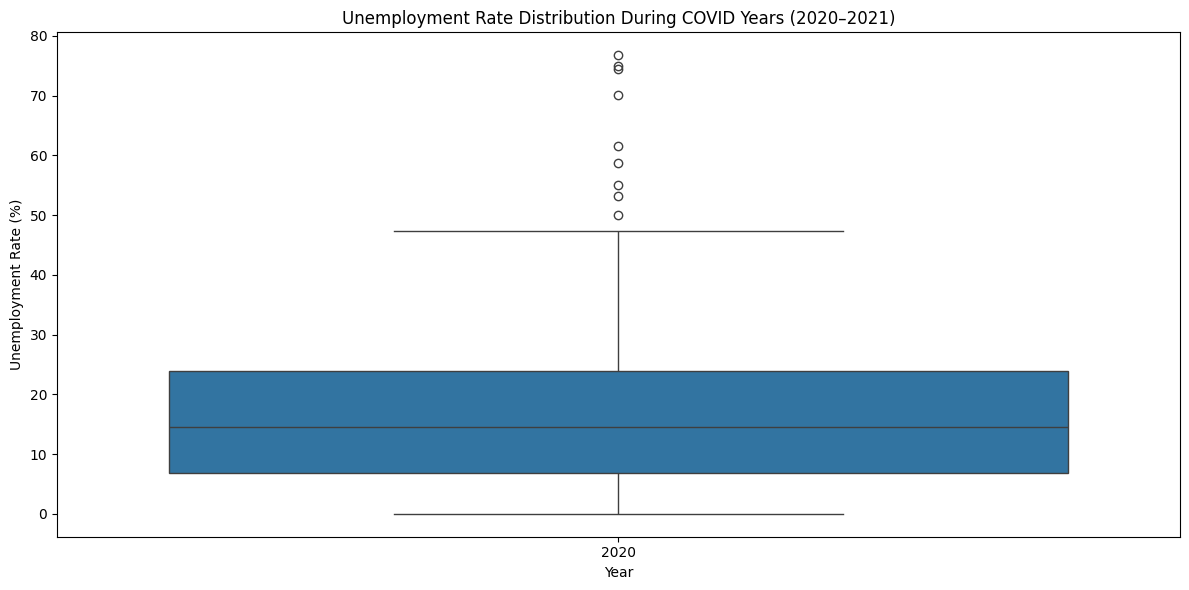

In [26]:
# Step 7: Focus on COVID-19 spike
covid = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-12-31')].copy()
covid['Year'] = covid['Date'].dt.year

plt.figure(figsize=(12,6))
sns.boxplot(data=covid, x='Year', y='Unemployment_Rate')
plt.title("Unemployment Rate Distribution During COVID Years (2020–2021)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

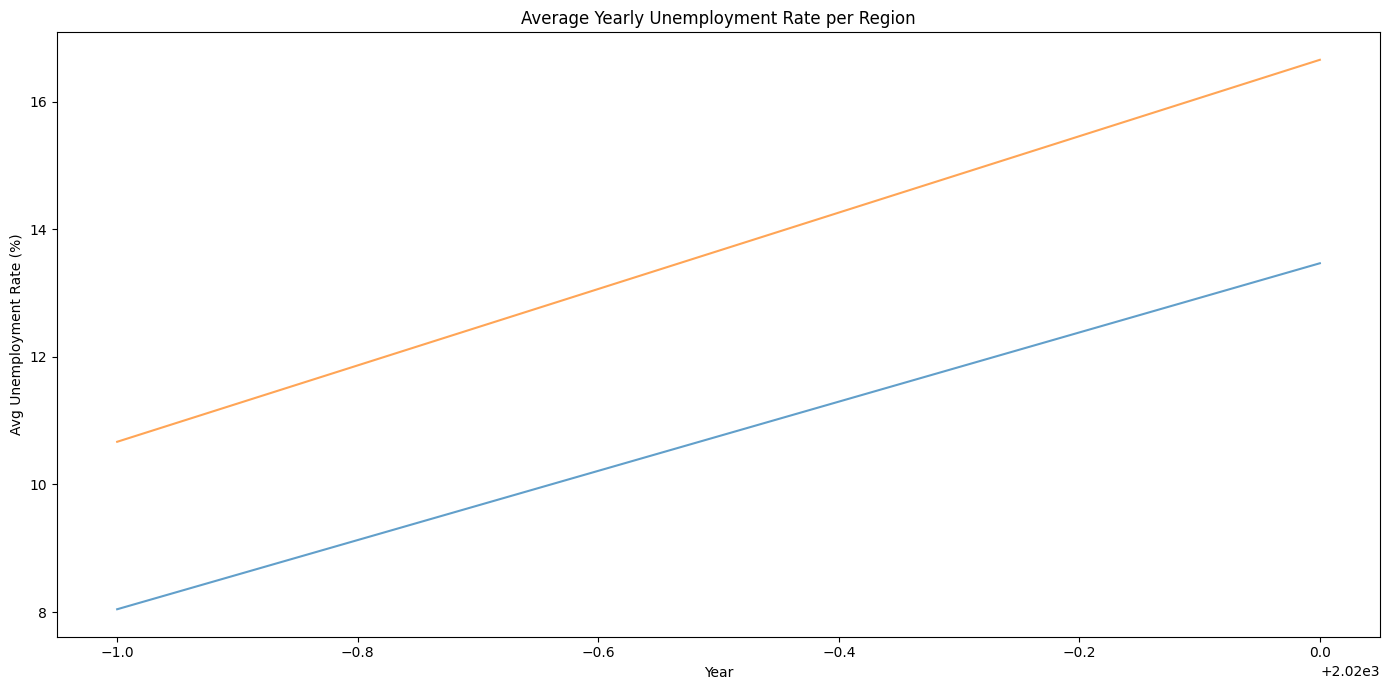

In [27]:
# Step 8: Yearly averages per state
df['Year'] = df['Date'].dt.year
yearly = df.groupby(['Year', 'Area'])['Unemployment_Rate'].mean().reset_index()
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly, x='Year', y='Unemployment_Rate', hue='Area', legend=False, alpha=0.7)
plt.title("Average Yearly Unemployment Rate per Region")
plt.xlabel("Year")
plt.ylabel("Avg Unemployment Rate (%)")
plt.tight_layout()
plt.show()

In [29]:
# Step 9: Identify top 5 worst-hit states during COVID
top_covid = covid.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False).head(5)
print("\n📈 Top 5 Worst-hit Regions (avg during COVID):")
print(top_covid)


📈 Top 5 Worst-hit Regions (avg during COVID):
Region
Puducherry    38.95500
Jharkhand     36.34875
Haryana       34.65250
Bihar         31.63125
Tripura       26.70250
Name: Unemployment_Rate, dtype: float64


/tmp/ipython-input-30-300322963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_covid.values, y=top_covid.index, palette='Reds_r')


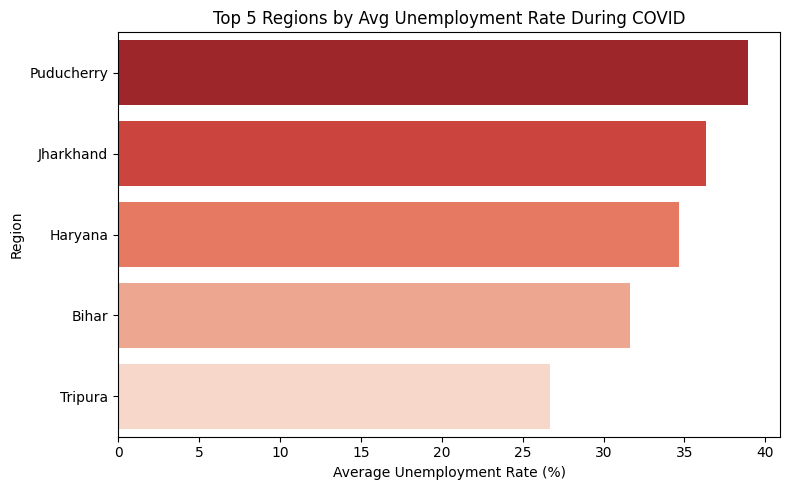

In [30]:
# Step 10: Display that in a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_covid.values, y=top_covid.index, palette='Reds_r')
plt.title("Top 5 Regions by Avg Unemployment Rate During COVID")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()